<table>
    <tr><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/[Data_Exploration]Data_Visualization_ratings.ipynb">
         <img alt="start" src="figures/button_previous.jpg" width= 70% height= 70%>
    </td><td>
        <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/Index.ipynb">
         <img alt="start" src="figures/button_table-of-contents.jpg" width= 70% height= 70%>
    </td><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/[Data_Exploration]Word-Clouds.ipynb">
         <img alt="start" src="figures/button_next.jpg" width= 70% height= 70%>
    </td></tr>
</table>

# Data Visualization for reviews
### Visualizing data from the reivews will help reveal the most impactful words or set of words for this classification problem.

In [4]:
# Import session from previus notebook
import dill
dill.load_session('notebook_env.db')

Stop-words are the words usually removed before processing of natural language data. Those are words which do not exress the sentiment of the writer such as the, is, at, which, and on. In various problems stop-words can differ or can be set manually. In every of the following graphs a version without stop-words is shown in order to give more emphasis to more meaningful words including the adjectives the nouns and etc. This is implemented by adding the "stop_words = 'english'" attribute το the CountVectorizer method. The CountVectorizer method is used to convert a collection of text documents to a matrix of token count.

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.feature_extraction.text import CountVectorizer

#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

The first graph shows the 20 most common of the words included in the reivews. It can be observed that the word 'game' is a very common word being found 805966 times in the reviews, although, while examining game-reviews it does not give any practical information, so, it can be considered as a stop-word later on to help improve the accuracy of the model. Also, the word 'not' eventhough most of the times it is treated as a stop-word, it indicates a negative attitude; together with the fact that it has been significantly found 263118 times, it may help the model correctly classify more negative reviews.

In [6]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df2 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df2.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

After removing the stop words, more meaningful words appear in the graph and as expected, most of those words are positive. The words play, playing and played are all being displayed eventhough it is the same word with different suffixes, this is why a technique like lemmatization or stemming must be used in order to recognize those words as one. The token "don" is most likely the first part of the contraction "don't" (do not) which expresses something negative so it can be merged with the token "not". By merging tokens the algorithms who consider the frequency of a word in order to score or classify a token will give a significantly higher score to the final token. More specifically for the tokens "don" and "not", the new token's frequency will be 263118(not) + 88352(don) = 351,470 which would be ranked second in the graph above. Finally the token "ve" can be considered as a stop-word because it is a contraction of the word "have" which is also a stop-word.

In [7]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df3.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [8]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df4 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df4.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

In [9]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df5 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df5.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

In [10]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)

df6 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df6.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# For categorical features, we simply use bar chart to present the frequency.
# The distribution of division
# df.groupby('Division Name').count()['Clothing ID'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
#                                                            title='Bar chart of Division Name', xTitle='Division Name')

In [13]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from collections import Counter
import string
import operator
import sys
import nltk

# Join all reviews into one string
reviewString = Corpus["reviewText"].str.cat(sep=' ')

# Keep the adjectives using nltk
tokens = nltk.word_tokenize(str(reviewString))
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)

punct = set(string.punctuation)
reviews_unpunct = ''.join(x for x in finalString if x not in punct)

# Split string into list of strings, again
word_list = reviews_unpunct.split()

# Perform count
counts_all = Counter(word_list)

words, count_values = zip(*counts_all.items())

# Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

# Top 10
words_sorted_top = words_sorted[0:30]
values_sorted_top = values_sorted[0:30]

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("The top {0} words are: \n{1}".format(30, words_sorted_top))
print("Their respective frequencies: \n{0}".format(values_sorted_top))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
# Pandas DataFrame just for visualisation
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
print("{0}".format(df))
sys.stdout.flush()
        
# Make xticklabels comprehensible by matplotlib
xticklabels = str(list(words_sorted_top)).split()
# Remove the single quotes, commas and enclosing square brackets
xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
The top 30 words are: 
('good', 'great', 'other', 'new', 'first', 'much', 'many', 'same', 'little', 'few', 'different', 'bad', 'original', 'easy', 'old', 'hard', 'fun', 'nice', 'real', 'only', 'such', 'big', 'own', 'able', 'last', 'main', 'next', 'sure', 'long', 'short')
Their respective frequencies: 
(118129, 108128, 93372, 80669, 71565, 60635, 58519, 51667, 50219, 49192, 48126, 36822, 32024, 31799, 31121, 29595, 29200, 27971, 26633, 26172, 25119, 24063, 23763, 23005, 22682, 20042, 19762, 19400, 19183, 18451)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
     count       word
0   118129       good
1   108128      great
2    93372      other
3    80669        new
4    71565      first
5    60635       much
6    58519       many
7    51667       same
8    50219     little
9    49192        few
10   48126  different
11   36822        bad
12   32024   original
13   31799       easy
14   31121        old


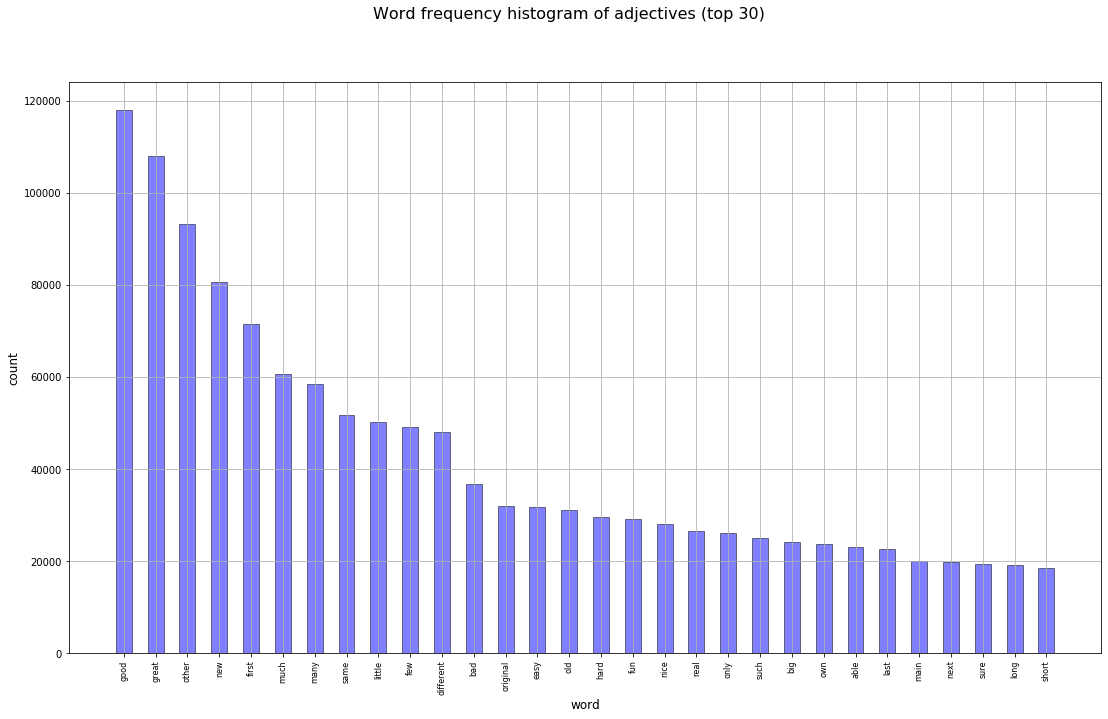

In [14]:
# Create the histogram
indices = np.arange(len(words_sorted_top))
width = 0.5
fig = plt.figure()
fig.suptitle('Word frequency histogram of adjectives (top {0})'.format(30), fontsize=16)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.grid()
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.bar(indices, values_sorted_top, width, edgecolor='k', facecolor='blue', alpha=0.5)
plt.xticks(indices, xtlabs, rotation='vertical', fontsize=8)
plt.show()

In [15]:
#Save this session for the next notebook
import dill
dill.dump_session('notebook_env.db')

<a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/[Data_Exploration]Word-Clouds.ipynb">
         <img alt="start" src="figures/button_next.jpg">